the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
Set MJD-END to 60174.981614 from DATE-END'. [astropy.wcs.wcs]


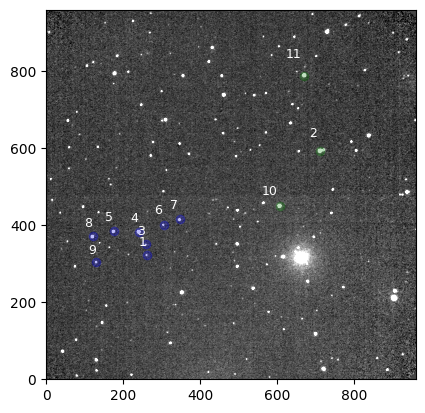

In [25]:
import os
import pandas as pd
from photometry import Photometry
from scripts.tools import sort_files
import astropy.io.fits as fits
import matplotlib.pyplot as plt
import numpy as np
from photometry import Photometry
from copy import copy

max_size = 10
star_name = "GRB 230818A"
_set = "first"
camera = 4
src_path = os.path.join(
    "..",
    "Pol charact MOPTOP",
    "Scientific objects",
    star_name,
    f"{_set} set",
    "combined runs",
)


csv_file = os.path.join(src_path, "..", "setup", f"objects coordinates.csv")
df = pd.read_csv(csv_file)
objects = {
    "name": df["name"],
    "ra": df[f"ra_cam{camera}"],
    "dec": df[f"dec_cam{camera}"],
}
file = os.path.join(src_path, "3_e_20230818_5_2_16_1.fits")
objects = pd.DataFrame.from_dict(objects)
objects = objects.drop(objects[objects["name"] == "star shifts"].index)
phot = Photometry(file, objects, max_size)
phot.reset_object_coords()

obj = phot.obj_list[0]
xsize = 300
ysize = 400
xcoord, ycoord = obj.xcoord, obj.ycoord
image = fits.getdata(file)
# [
#     ycoord - ysize : ycoord + ysize, xcoord - xsize : xcoord + xsize
# ]
median = np.median(image)
std = np.median(np.abs(image - median))
plt.imshow(
    image, vmax=median + 8 * std, vmin=median - 3 * std, origin="lower", cmap="gray"
)


for idx, _object in enumerate(phot.obj_list):
    name, x, y = _object.name, _object.xcoord, _object.ycoord
    # x += xsize - xcoord
    # y += ysize - ycoord
    color = "b"
    if name == "circular":
        color = "r"
    if "comparison" in name:
        color = "g"
        # continue
    if "eliminated" in name:
        color = "y"
    plt.plot(x, y, f"{color}o", alpha=0.25)
    plt.annotate(
        f"{idx+1}", (x * 0.99, y * 1.05), ha="right", va="bottom", fontsize=9, color="w"
    )


figure = os.path.join(src_path, "..", "plots", f"field_map.png")
plt.savefig(figure)
plt.show()

# Create photometry.csv

In [26]:
objects_photometry = {}
for obj_name in objects["name"]:
    objects_photometry[obj_name] = {
        "mjd": [],
        "xcoord": [],
        "ycoord": [],
        "psf_radius": [],
        "star_photons": [],
        "star_error": [],
    }

objects = objects[objects.name != "circular"]
image_list = sort_files(src_path, f"{camera}_e")
for file in image_list:
    file_path = os.path.join(src_path, file)

    phot = Photometry(file_path, objects, max_size)
    phot.reset_object_coords(3)
    phot.calculate_star_radius()
    phot.calc_sky_photons()
    phot.calc_star_photons()

    for _object in phot.obj_list:
        objects_photometry[_object.name]["mjd"].append(_object.mjd)
        objects_photometry[_object.name]["xcoord"].append(_object.xcoord)
        objects_photometry[_object.name]["ycoord"].append(_object.ycoord)
        objects_photometry[_object.name]["psf_radius"].append(phot.star_radius)
        objects_photometry[_object.name]["star_photons"].append(_object.star_photons)
        objects_photometry[_object.name]["star_error"].append(_object.star_err)

for obj_name, obj_info in objects_photometry.items():
    df = pd.DataFrame.from_dict(obj_info)
    csv_file = os.path.join(src_path, "..", "photometry", f"{obj_name}_cam{camera}.csv")
    df.sort_values(by=["mjd"])
    df.to_csv(csv_file, index=False)

Set MJD-END to 60174.980688 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 60174.982539 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 60174.983465 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 60174.984391 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 60174.985317 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 60174.986243 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 60174.987169 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 60174.988095 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 60174.989021 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 60174.989947 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 60174.990873 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 60174.991799 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 60174.992725 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 60174.993651 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 60174.994577 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 60174.995503 from DATE-END'. [astropy.wcs.wcs]
Set MJD-

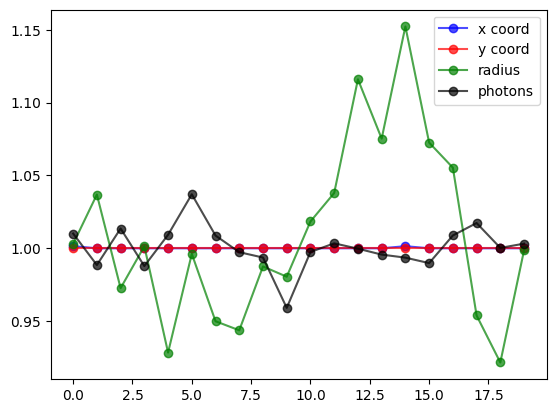

In [133]:
import pandas as pd
import matplotlib.pyplot as plt

target = "comparison3"
file = os.path.join(src_path, "..", "photometry", f"{target}_cam4.csv")
df = pd.read_csv(file)
x, y, radius, photons = df["xcoord"], df["ycoord"], df["psf_radius"], df["star_photons"]
x /= np.median(x)
y /= np.median(y)
radius /= np.median(radius)
photons /= np.median(photons)
plt.plot(x, "b-o", alpha=0.7, label="x coord")
plt.plot(y, "r-o", alpha=0.7, label="y coord")
plt.plot(radius, "g-o", alpha=0.7, label="radius")
plt.plot(photons, "k-o", alpha=0.7, label="photons")
plt.legend()
plt.show()

# Looking at the comparison star

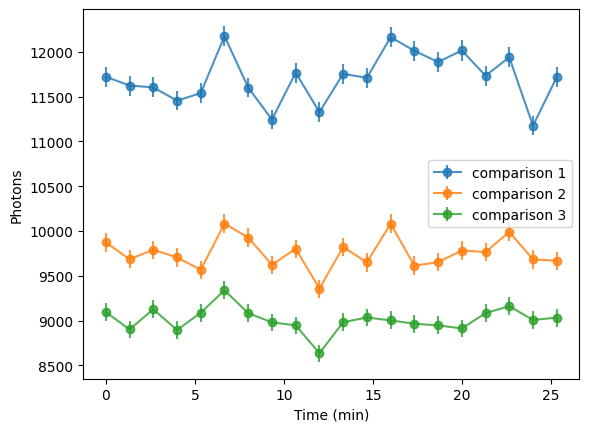

In [131]:
import pandas as pd
import matplotlib.pyplot as plt


def read_csv_files(file):
    df = pd.read_csv(csv_file)
    comp = df["star_photons"]
    comp_err = df["star_error"]

    mjd = df["mjd"]
    mjd = (mjd - mjd[0]) * 24 * 60

    return mjd, comp, comp_err


for idx in range(3):
    csv_file = os.path.join(src_path, "..", "photometry", f"comparison{idx+1}_cam3.csv")
    mjd, comp, comp_err = read_csv_files(csv_file)
    plt.errorbar(mjd, comp, comp_err, fmt="o-", alpha=0.8, label=f"comparison {idx+1}")
plt.legend()
plt.xlabel("Time (min)")
plt.ylabel("Photons")
plt.show()

# Creating the final comparison

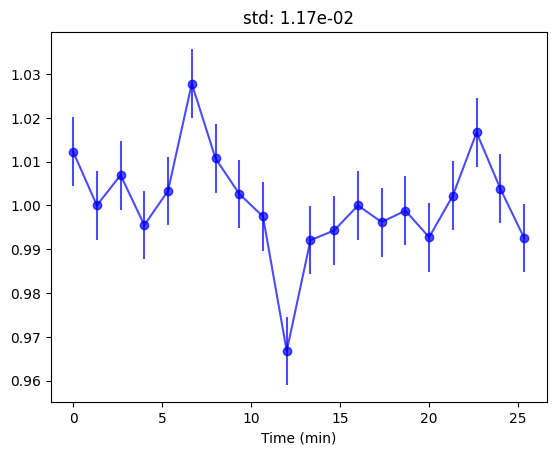

In [147]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


def combine_cameras_flux(idx):
    csv_path = os.path.join(src_path, "..", "photometry")

    df_cam3 = pd.read_csv(os.path.join(csv_path, f"comparison{idx}_cam3.csv"))
    df_cam4 = pd.read_csv(os.path.join(csv_path, f"comparison{idx}_cam4.csv"))

    mjd = df_cam3["mjd"]
    comp = df_cam3["star_photons"] + df_cam4["star_photons"]
    comp_err = np.sqrt(df_cam3["star_error"] ** 2 + df_cam4["star_error"] ** 2)
    return mjd, comp, comp_err


def read_comp_csv_files(_list):
    comp, comp_err = [], []
    for idx in _list:
        mjd, tmp, tmp_err = combine_cameras_flux(idx)
        comp.append(tmp)
        comp_err.append(tmp_err)

    comp = np.sum(comp, axis=0)
    comp_err = np.sqrt(np.sum(np.square(comp_err), axis=0))
    mjd_start = mjd[0]
    mjd = (mjd - mjd[0]) * 24 * 60

    return mjd, comp, comp_err, mjd_start


comparisons_list = [3]
mjd, comp, comp_err, _ = read_comp_csv_files(comparisons_list)
median = np.median(comp)
comp /= median
comp_err /= median
std = np.std(comp)
plt.errorbar(mjd, comp, comp_err, fmt="bo-", alpha=0.7)
plt.title(f"std: {std:.2e}")
plt.xlabel("Time (min)")
plt.show()

# Plot light curve

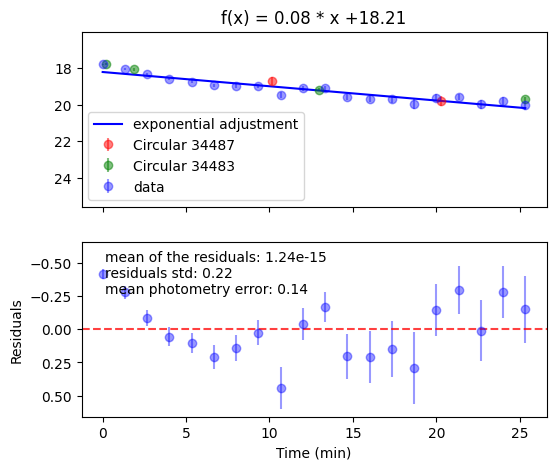

In [148]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np
import scipy
from math import sqrt, log10
from astropy.time import Time


def monoExp(x, a, b, c):
    return a * np.exp(-b * x) + c


def calc_obj_magnitude(star_photons, star_err, comp_photons, comp_err, mag_comparison):
    star_photons, comp_photons = np.asarray(star_photons), np.asarray(comp_photons)

    tmp = star_photons / comp_photons
    tmp_err = np.abs(tmp) * np.sqrt(
        (star_err / star_photons) ** 2 + (comp_err / comp_photons) ** 2
    )
    star_mag = -2.5 * np.log10(tmp) + mag_comparison
    star_mag_err = 2.5 * tmp_err / (tmp * np.log2(10))
    return star_mag, star_mag_err


def calc_exponential_adjust(x, y):
    params, _ = scipy.optimize.curve_fit(monoExp, x, y)
    a, b, c = params
    exp_adjust = monoExp(x, a, b, c)
    return exp_adjust, a, b, c


def calc_linear_adjust(x, y):
    a, b = np.polyfit(x, y, 1)
    return a * x + b, a, b


def plot_light_curve(ax, mjd, cand, cand_err, adjust, adjus_param, n_std=1):
    a, b = adjus_param
    mean = np.mean(cand)
    std = np.std(cand)
    ax.errorbar(
        mjd, cand, cand_err, marker="o", color="b", alpha=0.4, label="data", ls="none"
    )

    ax.plot(mjd, adjust, "b-", label="exponential adjustment")
    ax.set_title(f"f(x) = {a:.2f} * x +{b:.2f}")
    ax.legend(loc="lower left")
    ax.set_ylim(mean - n_std * std, mean + 2 * n_std * std)
    ax.invert_yaxis()


def plot_residuals(ax, cand, cand_err, adjust, n_std=3):
    residuals = cand - adjust
    mean = np.mean(residuals)
    std = np.std(residuals)

    ax.errorbar(
        mjd,
        residuals,
        cand_err,
        marker="o",
        color="b",
        alpha=0.4,
        label="data",
        ls="none",
    )
    ax.set_ylabel("Residuals")
    ax.axhline(mean, color="r", linestyle="--", alpha=0.75)
    ax.set_ylim(mean - n_std * std, mean + n_std * std)
    ax.set_xlabel("Time (min)")
    ax.invert_yaxis()
    ax.annotate(
        f"mean of the residuals: {mean:.2e}\nresiduals std: {std:.2f}\nmean photometry error: {np.mean(cand_err):.2f}",
        (0.05, 0.95),
        fontsize=10,
        ha="left",
        va="top",
        xycoords="axes fraction",
    )


def plot_circular_data(mjd_start: float, ax):
    circulars = ["34487", "34483"]
    for idx, circular in enumerate(circulars):
        csv_path = os.path.join(src_path, "..", "Circulars", circular + ".csv")
        df = pd.read_csv(csv_path)
        utc = df["UT start"].values
        n = 4

        mjd = [Time(value, format="isot").to_value("mjd") for value in utc] - mjd_start
        mjd *= 24 * 60
        mag = df["Rmag"]
        err = df["err"]

        ax.errorbar(
            mjd[:n],
            mag[:n],
            err[:n],
            marker="o",
            color=["r", "g"][idx],
            label="Circular " + circular,
            alpha=0.5,
            ls="none",
        )


def read_star_csv_files(candidate):
    csv_path = os.path.join(src_path, "..", "photometry")
    df_cam3 = pd.read_csv(os.path.join(csv_path, f"candidate{candidate}_cam3.csv"))
    df_cam4 = pd.read_csv(os.path.join(csv_path, f"candidate{candidate}_cam4.csv"))

    cand = df_cam3["star_photons"] + df_cam4["star_photons"]
    cand_err = np.sqrt(df_cam3["star_error"] ** 2 + df_cam4["star_error"] ** 2)

    mjd = df_cam3["mjd"]
    mjd = (mjd - mjd[0]) * 24 * 60

    return mjd, cand, cand_err


fig, axs = plt.subplots(2, 1, figsize=(6, 5), sharex="col", sharey="row")
mjd, star, star_err = read_star_csv_files(candidate=1)
mjd, comp, comp_err, mjd_start = read_comp_csv_files(comparisons_list)

# norm_star = star / comp
# norm_err = np.abs(norm_star) * np.sqrt((star_err / star) ** 2 + (comp_err / comp) ** 2)
# mean = np.mean(norm_star)
# norm_star /= mean
# norm_err /= mean
comp_magR = 14.543
norm_star, norm_err = calc_obj_magnitude(star, star_err, comp, comp_err, comp_magR)
linear_adjust, *adjus_param = calc_linear_adjust(mjd, norm_star)

plot_circular_data(mjd_start, axs[0])
plot_light_curve(axs[0], mjd, norm_star, norm_err, linear_adjust, adjus_param, 5)

plot_residuals(axs[1], norm_star, norm_err, linear_adjust, 3)


plt.savefig(os.path.join(src_path, "..", "plots", "light_curve.png"))
plt.show()

# Plot mag for all candidates

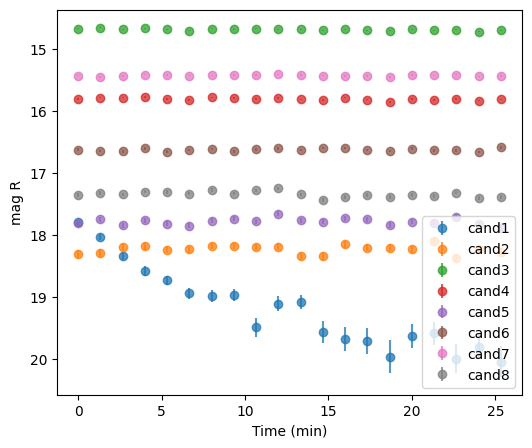

In [149]:
mjd, comp, comp_err, mjd_start = read_comp_csv_files(comparisons_list)


comp_magR = 14.543
fig, ax = plt.subplots(1, 1, figsize=(6, 5), sharex="col", sharey="row")
n_std = 3
for idx in range(8):
    mjd, star, star_err = read_star_csv_files(candidate=idx + 1)
    star, star_err = calc_obj_magnitude(star, star_err, comp, comp_err, comp_magR)
    mean, std = np.mean(star), np.std(star)

    ax.errorbar(
        mjd,
        star,
        star_err,
        marker="o",
        alpha=0.75,
        ls="none",
        label=f"cand{idx+1}",
    )

ax.invert_yaxis()
plt.xlabel("Time (min)")
plt.ylabel("mag R")
ax.legend(loc="lower right")
plt.savefig(os.path.join(src_path, "..", "plots", "all light curves.png"))
plt.show()